## Planning SPARK FUNDS Investing Strategies

For SPARK FUNDS (an asset management firm) to effectively invest in companies, it needs to analyse and understand the global investment trends. The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

    While doing this study, SPARK FUNDS constraints have been kept in mind, namely, 
    1) The firm wishes to invest between 5 – 15 million USD per round of investment, and 2) wants to invest in English speaking countries only for ease of communication with the companies. For this, global trends have been studied to find out which funding types, countries suit our requirements better. 
    Also from the data available, top sectors that have been most preferred in various 
    countries have also been studied.

    Through this, an exhaustive list of data has been prepared and visualization results are shared to find out the firm’s investment targets.

In [3]:
import os
import pandas as pd
import numpy as np
companies = pd.read_csv('companies.txt', delimiter = '\t', encoding='ISO-8859-1')
#companies.head()

rounds2 = pd.read_csv('rounds2.csv', sep=',', encoding='ISO-8859-1')
#rounds2.head()

In [5]:
#--------------------------------------------CHECKPOINT-1 Begin ---------------------------------------------------

In [6]:
#convert all company_permalink entries to lowercase
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [16]:
# Ques:'How many unique companies are present in rounds2?'
# Sol:  company_permalink represents unique id of the company, so by finding the number of unique company_permalink in rounds2 table, 
#       we can find out the number of unique companies (associated with those company_permalink)
rounds2.company_permalink.nunique()

66370

In [19]:
# Ques:'How many unique companies are present in companies?'
# Sol:  finding unique company names
companies.name.nunique()

66102

In [109]:
#Ques: 'Are there any companies in the rounds2 file which are not present in companies? Answer yes or no:Y/N'
#Sol:   see the end
df1 = rounds2['company_permalink']    #count=114949
df2 = companies['permalink']      #count=66368
#now we know that the df1 contains many duplicates. Lets clear the duplicates from df1 first.
df1 = df1.drop_duplicates(keep='first', inplace = False)      #df1.count()  -> count=66370

#Now lets make use of set concept to find out if rounds2 has more companies than companies df
set_1 = set(df1)
set_2 = set(df2)
a = len(list(set_1.difference(set_2)))
print(a==0)
#Sol: the len comes out to be 7, and not 0. Therefore there are 7 more unique companies in rounds2 df than in companies df.

False


In [110]:
#Ques:'Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
#      Name the merged frame master_frame. How many observations are present in master_frame?'
#Sol:  
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
#master_frame.info()     #no of observations is 114949.
print(master_frame.shape[0])    #no. of observations is equal to total number of rows = 114949

114949


In [111]:
#--------------------------------------------CHECKPOINT-1 End ---------------------------------------------------

In [112]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

#What is the total amount raised (in usd) across all investment types. We will use this later while plotting
total_raised_amount_usd = master_frame.raised_amount_usd.sum()
total_raised_amount_usd

990125085135.0

In [113]:
#--------------------------------------------CHECKPOINT-2 Begin ---------------------------------------------------

In [114]:
funding_type = ['seed','angel','venture','private_equity']

#Lets define a Dataframe 'master_f1' that contains the data having only the funding types as mentioned in the list above
master_f1 = master_frame[master_frame.funding_round_type.isin(funding_type)]
master_f1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11/9/2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [115]:
#Ques: 'Avg of funding_round_type'
master_f1.groupby(['funding_round_type']).mean()

#Avg funding_type
#1.Angel      -> 0.9586945 million
#2.Pvt_equity -> 73.308590 million
#3.Seed       -> 0.719818 million
#4.Venture    -> 11.748950 million

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
private_equity,7.330859e+07
seed,7.198180e+05
venture,1.174895e+07


In [116]:
#Lets find sum and avg of all investments across the different funding types
#This info we shall use later while plotting PLOT1

master_seed = master_f1[master_f1.funding_round_type=='seed']
master_venture = master_f1[master_f1.funding_round_type=='venture']
master_angel = master_f1[master_f1.funding_round_type=='angel']
master_pvteq = master_f1[master_f1.funding_round_type=='private_equity']

#Sum of all investments across respective funding types
Seed_total_raised_amount_usd = master_seed.raised_amount_usd.sum()
Venture_total_raised_amount_usd = master_venture.raised_amount_usd.sum()
Angel_total_raised_amount_usd = master_angel.raised_amount_usd.sum()
PvtEq_total_raised_amount_usd = master_pvteq.raised_amount_usd.sum()
Other_total_raised_amount_usd = total_raised_amount_usd - (Seed_total_raised_amount_usd + Venture_total_raised_amount_usd + Angel_total_raised_amount_usd + PvtEq_total_raised_amount_usd)

#List of the total amount raised across funding stage - 'Seed', 'Venture', 'Angel', Private Equity', 'Other'
Raised_amount_usd_fund_types_sum = [Seed_total_raised_amount_usd, Venture_total_raised_amount_usd, Angel_total_raised_amount_usd, PvtEq_total_raised_amount_usd, Other_total_raised_amount_usd]

#Avg of all investments across respective funding types
Seed_mean_raised_amount_usd = master_seed.raised_amount_usd.mean()
Venture_mean_raised_amount_usd = master_venture.raised_amount_usd.mean()
Angel_mean_raised_amount_usd = master_angel.raised_amount_usd.mean()
PvtEq_mean_raised_amount_usd = master_pvteq.raised_amount_usd.mean()

#List of the average amount raised across funding stage - 'Seed', 'Venture', 'Angel', Private Equity'
Raised_amount_usd_fund_types_avg = [Seed_mean_raised_amount_usd, Venture_mean_raised_amount_usd, Angel_mean_raised_amount_usd, PvtEq_mean_raised_amount_usd]


In [117]:
#--------------------------------------------CHECKPOINT-2 End ---------------------------------------------------

In [118]:
#--------------------------------------------CHECKPOINT-3 Begin ---------------------------------------------------

In [119]:
#Since for Spark Funds, the most suitable funding type is 'Venture', we shall now proceed with 'master_venture' dataframe for our further analysis

#Before moving further let us drop few columns that are not needed for further analysis
master_venture

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,9/11/2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,9/10/2009,7991547.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [120]:
del master_venture['funding_round_code']

In [121]:
del master_venture['funding_round_permalink']

In [122]:
del master_venture['funded_at']

In [123]:
del master_venture['permalink']

In [124]:
del master_venture['homepage_url']

In [125]:
del master_venture['status']

In [126]:
del master_venture['state_code']

In [127]:
del master_venture['region']

In [128]:
del master_venture['city']

In [129]:
del master_venture['founded_at']

In [130]:
master_venture

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
114931,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,MYS
114934,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA
114936,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA
114937,/organization/zytoprotec,venture,2686600.0,Zytoprotec,Biotechnology,AUT


In [131]:
#Next task is to find out the English speaking countries form Wikipedia link given in the problem using web scraping

#Here is how I will approach this problem:
#1.Filter out the all the countrycodes in list called 'CountryCode', 
#2.Filter out the Primary language status of the aboe respective countries in another list called 'PriLang'
#3.If a given countries primary/official/educational/business language is not English, then I replace the country code with 'Null'
#4. In this way the list called 'CountryCode' will ultimately carry the country codes having English as their primary/official/business/educational language


import requests, bs4
from bs4 import BeautifulSoup
 #getting HTML from the Wikipedia
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language').text
soup = BeautifulSoup(website_url,'lxml')

In [132]:
#Our list carrying CountryCode
CountryCode = []
for row in soup.findAll('table',{'class':'wikitable sortable'})[1].tbody.findAll('tr'):
    first = row.findAll('td')[2:3]
    CountryCode = CountryCode + [first]

CountryCode = [i.strip('') if type(i) == str else str(i) for i in CountryCode]
CountryCode = CountryCode[1:]
CountryCode = CountryCode[:len(CountryCode)+1]

#Since all the Country Codes are of 3 alphabet long, therefore lets extract them
CountryCode = [[ele for ele in CountryCode[i][5:8]] for i in range(0, len(CountryCode))]

#Lets club the country code
for i in range(0, len(CountryCode)):
    CountryCode[i] = CountryCode[i][0]+CountryCode[i][1]+CountryCode[i][2]
CountryCode

['ATG',
 'BHS',
 'BRB',
 'BLZ',
 'BWA',
 'BDI',
 'CMR',
 'CAN',
 'COK',
 'DMA',
 'SWZ',
 'FJI',
 'GMB',
 'GHA',
 'GRD',
 'GUY',
 'IND',
 'IRL',
 'JAM',
 'KEN',
 'KIR',
 'LSO',
 'LBR',
 'MWI',
 'MLT',
 'MHL',
 'MUS',
 'FSM',
 'NAM',
 'NRU',
 'NGA',
 'NIU',
 'PAK',
 'PLW',
 'PNG',
 'PHL',
 'RWA',
 'KNA',
 'LCA',
 'VCT',
 'WSM',
 'SYC',
 'SLE',
 'SGP',
 'SLB',
 'SOM',
 'ZAF',
 'SSD',
 'SDN',
 'TZA',
 'TON',
 'TTO',
 'TUV',
 'UGA',
 'VUT',
 'ZMB',
 'ZWE']

In [133]:
#Next task is to find out the above countries respective English language status

PriLang = []      #Lets call this list PriLang short for Primary Language

for row in soup.findAll('table',{'class':'wikitable sortable'})[1].tbody.findAll('tr'):
    first = row.findAll('td')[5:6]
    PriLang = PriLang + [first]

PriLang = [i.strip('') if type(i) == str else str(i) for i in PriLang]
PriLang = PriLang[1:]
PriLang = PriLang[:len(CountryCode)+1]
PriLang = [[ele for ele in PriLang[i][5:8]] for i in range(0, len(PriLang))]

for i in range(0,len(PriLang)):
    if(PriLang[i] == ['Y','e','s']):    #The countries with PrimaryLang status = YES are given value 1 in this list
        PriLang[i]= 1
    elif(PriLang[i] == ['N','o','\n']): #The countries with PrimaryLang status = No ('with no exceptions'),
        PriLang[i]= 0                   #are given value 0 in this list

#For some cases, where English is Not Primary/Official/Education/Business but a lingua franca, won't be considered
#for English status as well, and hence the status is set to 0-> like Namibia, Nauru and Zimbabwe
PriLang[29]=0
PriLang[30]=0
PriLang[56]=0

#for countries where English is not Primary but official/educational or business language will be set with status=1
for i in range(0,len(PriLang)):
    if(PriLang[i] == ['N','o',' ']):
        PriLang[i]= 1
PriLang

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0]

In [134]:
#Now we have list CountryCode and PriLang, we can now find out which CountryCode to keep and which ones to reject.
#The ones that have to be rejected will be replaced with '0'
for k in CountryCode[:]:
    if(PriLang[CountryCode.index(k)]==0):
        CountryCode[CountryCode.index(k)] = 0

#Adding defacto english speaking countries:
EngSpeak = ['AUS','USA','GBR','NZL']
CountryCode = CountryCode + EngSpeak

#This is our final CountryCode list containing Countries with Primary/official/education/business language as English
CountryCode

['ATG',
 'BHS',
 'BRB',
 'BLZ',
 0,
 0,
 0,
 'CAN',
 'COK',
 'DMA',
 0,
 'FJI',
 0,
 'GHA',
 'GRD',
 'GUY',
 'IND',
 'IRL',
 'JAM',
 'KEN',
 0,
 0,
 'LBR',
 0,
 'MLT',
 0,
 0,
 0,
 'NAM',
 0,
 0,
 0,
 'PAK',
 0,
 'PNG',
 'PHL',
 'RWA',
 'KNA',
 'LCA',
 'VCT',
 0,
 0,
 'SLE',
 'SGP',
 0,
 'SOM',
 'ZAF',
 0,
 0,
 0,
 0,
 'TTO',
 0,
 'UGA',
 0,
 0,
 0,
 'AUS',
 'USA',
 'GBR',
 'NZL']

In [135]:
#Now we will find out which countries in the list 'master_venture_country' are part of 'CountryCode' 
#and consider those only

master_venture_country = master_venture[master_venture.country_code.isin(CountryCode)]
master_venture_country.head(60)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA
28,/organization/10-minutes-with,venture,4000000.0,10 Minutes With,Education,GBR
34,/organization/1000memories,venture,2520000.0,1000memories,Curated Web,USA
38,/organization/1000museums-com,venture,265940.0,1000museums.com,Curated Web,USA
39,/organization/1000museums-com,venture,2906832.0,1000museums.com,Curated Web,USA


In [136]:
top = master_venture_country[['country_code', 'raised_amount_usd']]

#top.set_index('country_code', inplace=True)
#We need to clean off the data where the country code is NaN
top = top.groupby(['country_code']).sum()
top = top.sort_values(['raised_amount_usd'], ascending = False)

top9 = top.head(9)
#groupby loses the column name so reseting index to get back the groupby column
top9 = top9.reset_index()
#Adding a column of Country Name. It will be more comprehensible when we plot the graph later to present to CEO.
top9['country_name'] = ['United States of America', 'Great Britain', 'India', 'Canada', 'Singapore', 'Ireland', 'Australia', 'New Zealand', 'South Africa']
top9

,country_code,raised_amount_usd,country_name
0,USA,4.225108e+11,United States of America
1,GBR,2.024563e+10,Great Britain
2,IND,1.439186e+10,India
3,CAN,9.583332e+09,Canada
4,SGP,2.793918e+09,Singapore
5,IRL,1.676131e+09,Ireland
6,AUS,1.322935e+09,Australia
7,NZL,4.483164e+08,New Zealand
8,ZAF,2.340629e+08,South Africa


In [137]:
#Ques: Top 3 english speaking countries where most investment has been made
top3 = top9.head(3)
top3

,country_code,raised_amount_usd,country_name
0,USA,4.225108e+11,United States of America
1,GBR,2.024563e+10,Great Britain
2,IND,1.439186e+10,India


In [138]:
#--------------------------------------------CHECKPOINT-3 End ---------------------------------------------------

In [139]:
#--------------------------------------------CHECKPOINT-4 Begin ---------------------------------------------------

In [140]:
master_venture_cat = master_venture_country
master_venture_cat = master_venture_cat[~pd.isnull(master_venture_cat.category_list)]

Primary_sector = master_venture_cat['category_list'].tolist()
        
for i in range(0,len(Primary_sector)):
    Primary_sector[i] = Primary_sector[i].split('|')
    Primary_sector[i] = Primary_sector[i][0]

#Primary_sector

In [141]:
#Adding column called 'PrimarySector' that contains the primary sector (as defined in ques) for every company as defined
master_venture_cat.loc[:,'PrimarySector'] = Primary_sector

In [142]:
master_venture_cat

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,PrimarySector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,Analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA,Analytics
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,Analytics
...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,Biotechnology,USA,Biotechnology
114922,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,USA,Biotechnology
114923,/organization/zyomyx-inc,venture,555016.0,ZYOMYX,Biotechnology,USA,Biotechnology
114934,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA,E-Commerce


In [143]:
mapping = pd.read_csv('mapping.csv')

In [144]:
mapping = mapping[~pd.isnull(mapping.category_list)]
mapping.Blanks.sum() #Simce Blanks column has nithing we can drop it 
del mapping['Blanks']

In [145]:
#There are some discrepencies in the 'category_list' column data. Observation is that in place of 'na' , '0' has been typed in data
#We need to fix this discrepency by replacing '0' with 'na'

category_list = mapping.category_list.tolist() 
category_list = ([[s.replace('0', 'na') for s in string] for string in category_list])
category_list = [''.join(category_list[i]) for i in range(0,len(category_list))]

#Also in case where the column data string starts with '0', we need to replace it with 'Na' so that 
#there no mismatch later when we merge the dataframe with 'mapping' dataset.
category_list[470] = 'Nanotechnology'
category_list[471] = 'Natural Language Processing'
category_list[472] = 'Natural Resources'
category_list[473] = 'Navigation'
#There is an entry called 'Enterprise 2.0' which would have been replaced to 'Enterprise 2.na'. Lets correct it.
category_list[242] = 'Enterprise 2.0'

#category_list

In [146]:
#Lets add the Modified Category_list to the mapping dataframe and name it 'ModCategoryList'
mapping.loc[:, 'ModCategoryList'] = category_list

In [147]:
#Also we don't need the category_list column as it had discrepencies, as we already have the 'ModCategoryList'
#column with discrepencies fixed
del mapping['category_list']

In [148]:
#We need to map the Primary sector with one among the eight sectors as petr the table.
#We will make use of idxmax() operation that takes in a numeric value, and returns the index of the first 
#occurrence of the max value provided in the argument.

Sector_series = pd.get_dummies(mapping).idxmax(1)
Sector_name = list(Sector_series)
mapping.loc[:,'Sector_Name'] = Sector_name

#Dropping the other columns as they are not required anymore
mapping=mapping.drop(['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'], axis=1)
mapping

,ModCategoryList,Sector_Name
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [149]:
#Merging the dataframes master_venture_cat and mapping to get the final master_venture_sector dataframe.
#The two new columns have been added to the master_venture_cat df at the end.

#We will inner join here as there are some values like 'Biotechnology and Semiconductors' which are not present in the mapping dataframe

master_venture_sector = pd.merge(master_venture_cat, mapping, how = 'inner', left_on = 'PrimarySector', right_on = 'ModCategoryList')
master_venture_sector

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,PrimarySector,ModCategoryList,Sector_Name
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Media,Entertainment
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Media,Entertainment
3,/organization/90min,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Media,Entertainment
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...
40787,/organization/yapta,venture,4220000.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Tracking,Others
40788,/organization/yapta,venture,2000000.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Tracking,Others
40789,/organization/yapta,venture,1786563.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Tracking,Others
40790,/organization/ziftit,venture,4000000.0,Ziftit,Gift Registries|Shopping,USA,Gift Registries,Gift Registries,Others


In [150]:
#Let us drop 'ModCategoryList' column as it is same as 'PrimarySector' column
del master_venture_sector['ModCategoryList']

In [151]:
master_venture_sector

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,PrimarySector,Sector_Name
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
3,/organization/90min,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...
40787,/organization/yapta,venture,4220000.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Others
40788,/organization/yapta,venture,2000000.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Others
40789,/organization/yapta,venture,1786563.0,Yapta,Tracking|Transportation|Travel,USA,Tracking,Others
40790,/organization/ziftit,venture,4000000.0,Ziftit,Gift Registries|Shopping,USA,Gift Registries,Others


In [152]:
#--------------------------------------------CHECKPOINT-4 End -----------------------------------------------------

In [153]:
#--------------------------------------------CHECKPOINT-5 Begin ---------------------------------------------------

In [154]:
#1. Now we will prepare 3 dataframes D1, D2, and D3 for the top 3 countries respectively.
#2. Also we will filter the investments lying in the 5 million to 15 million range.

In [155]:
#Lets make a panda series containing boolean values based on whether the country_code is USA
USA = master_venture_sector.country_code == 'USA'
#Lets create D1 dataframe out of our master_venture_sector that conatins country_code as 'USA' only.
D1 = master_venture_sector[USA]

#Let us filter based on the investments made in any round lying in 5million to 15 million range.
D1 = D1[D1.raised_amount_usd >= 5000000]
D1 = D1[D1.raised_amount_usd <= 15000000]


#Lets make a panda series containing boolean values based on whether the country_code is GBR
GBR = master_venture_sector.country_code == 'GBR'
#Lets create D1 dataframe out of our master_venture_sector that conatins country_code as 'GBR' only.
D2 = master_venture_sector[GBR]

#Let us filter based on the investments made in any round lying in 5 million to 15 million range.
D2 = D2[D2.raised_amount_usd >= 5000000]
D2 = D2[D2.raised_amount_usd <= 15000000]


#Lets make a panda series containing boolean values based on whether the country_code is IND
IND = master_venture_sector.country_code == 'IND'
#Lets create D1 dataframe out of our master_venture_sector that conatins country_code as 'IND' only.
D3 = master_venture_sector[IND]

#Let us filter based on the investments made in any round lying in 5million to 15 million range.
D3 = D3[D3.raised_amount_usd >= 5000000]
D3 = D3[D3.raised_amount_usd <= 15000000]

In [1]:
#D1

In [2]:
#D2

In [3]:
#D3

In [159]:
#Lets create a list of Main_Sectors

Main_Sectors = ['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']

#Lets put this in a dataframe called Main_Sectors
Main_Sectors = pd.DataFrame(Main_Sectors, columns=['Main_Sector'])

In [160]:
#Now we will calculate 
           #1. the total number of investments across all three countries.
           #2. the total amount of investments across all three countries (Note that we have calculated this before in checkpoint2, but lets calculate again as we have might have done some filtering since checkpoint 2)

In [161]:
#1. For USA (C1)

CountD1 = D1.groupby(['Sector_Name']).count()
CountD1 = list(CountD1.country_code)

AmountD1 = D1.groupby(['Sector_Name']).sum()
AmountD1 = list(AmountD1.raised_amount_usd)

Main_SectorsD1 = Main_Sectors

Main_SectorsD1['No. of Investments'] = CountD1
Main_SectorsD1['Amount of Investment'] = AmountD1

In [162]:
Top3NumInvWiseD1 = Main_SectorsD1.sort_values(by = ['No. of Investments'], ascending = False)
Top3NumInvWiseD1['Country'] = 'USA'
Top3NumInvWiseD1 = Top3NumInvWiseD1[:3]
Top3NumInvWiseD1

,Main_Sector,No. of Investments,Amount of Investment,Country
6,Others,2950,2.632101e+10,USA
7,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
1,Cleantech / Semiconductors,2350,2.163343e+10,USA


In [163]:
#Merging D1 and Main_SectorD1

D1 = pd.merge(D1, Main_SectorsD1, how = 'left', left_on = 'Sector_Name', right_on = 'Main_Sector')

In [164]:
#Deleting the Main_Sector column as it is same as 'Sector_Name' column and redundant.
del D1['Main_Sector']

In [165]:
#Finding Total number of investments across sectors for USA
CountInvestUSA = sum(CountD1)
CountInvestUSA           #Total number of investments across sectors for USA = 12063

12063

In [166]:
#Finding Total amount of investments across sectors for USA
AmountInvestUSA = sum(AmountD1)
AmountInvestUSA           #Total amount of investments across sectors for USA = 107757097294.0

107757097294.0

In [167]:
#Df with Company name, Its sector name and Amount raised in USD
CompanySectorAmountD1 = D1[['name', 'Sector_Name', 'raised_amount_usd']]

In [168]:
#Company with most number of investments in top main_sector

Main_Sec1 = CompanySectorAmountD1.Sector_Name == 'Others'
TopSectorCompanyD1 = CompanySectorAmountD1[Main_Sec1]

#Note that the TopSectorComapnyD1 shows the sum of money raised by the company in different rounds of funding.
TopSectorCompanyD1 = TopSectorCompanyD1.groupby(['name']).sum()
TopSectorCompanyD1 = TopSectorCompanyD1.sort_values(['raised_amount_usd'], ascending = False)
#Lets list the top4 companies
TopSectorCompanyD1[:1]

,raised_amount_usd
name,
Virtustream,64300000.0


In [169]:
#Company with most number of investments in second-best main_sector
Main_Sec2 = CompanySectorAmountD1.Sector_Name == 'Social, Finance, Analytics, Advertising'
SecBestSectorCompanyD1 = CompanySectorAmountD1[Main_Sec2]

SecBestSectorCompanyD1 = SecBestSectorCompanyD1.groupby(['name']).sum()
SecBestSectorCompanyD1 = SecBestSectorCompanyD1.sort_values(['raised_amount_usd'], ascending = False)
SecBestSectorCompanyD1[:1]

,raised_amount_usd
name,
SST Inc. (Formerly ShotSpotter),67933006.0


In [170]:
#2. For GBR (C2)

CountD2 = D2.groupby(['Sector_Name']).count()
CountD2 = list(CountD2.country_code)

AmountD2 = D2.groupby(['Sector_Name']).sum()
AmountD2 = list(AmountD2.raised_amount_usd)

Main_SectorsD2 = Main_Sectors

Main_SectorsD2['No. of Investments'] = CountD2
Main_SectorsD2['Amount of Investment'] = AmountD2

In [171]:
Top3NumInvWiseD2 = Main_SectorsD2.sort_values(by = ['No. of Investments'], ascending = False)
Top3NumInvWiseD2['Country'] = 'GBR'
Top3NumInvWiseD2 = Top3NumInvWiseD2[:3]
Top3NumInvWiseD2

,Main_Sector,No. of Investments,Amount of Investment,Country
6,Others,147,1.283624e+09,GBR
7,"Social, Finance, Analytics, Advertising",133,1.089404e+09,GBR
1,Cleantech / Semiconductors,130,1.163990e+09,GBR


In [172]:
#Merging D2 and Main_SectorD2

D2 = pd.merge(D2, Main_SectorsD2, how = 'left', left_on = 'Sector_Name', right_on = 'Main_Sector')

In [173]:
#Deleting the Main_Sector column as it is same as 'Sector_Name' column and redundant.
del D2['Main_Sector']

In [174]:
#Now we will calculate 
           #1. the total number of investments across all three countries.
           #2. the total amount of investments across all three countries.

In [175]:
#Finding Total number of investments across sectors for GBR
CountInvestGBR = sum(CountD2)
CountInvestGBR            #Total number of investments across sectors for GBR = 621

621

In [176]:
#Finding Total amount of investments across sectors for GBR
AmountInvestGBR = sum(AmountD2)
AmountInvestGBR           #Total amount of investments across sectors for GBR = 5379078691.0

5379078691.0

In [177]:
#Df with Company name, Its sector name and Amount raised in USD
CompanySectorAmountD2 = D2[['name', 'Sector_Name', 'raised_amount_usd']]

In [178]:
#Company with most number of investments in top main_sector

Main_Sec1 = CompanySectorAmountD2.Sector_Name == 'Others'
TopSectorCompanyD2 = CompanySectorAmountD2[Main_Sec1]

#Note that the TopSectorComapnyD2 shows the sum of money raised by the company in different rounds of funding.
TopSectorCompanyD2 = TopSectorCompanyD2.groupby(['name']).sum()
TopSectorCompanyD2 = TopSectorCompanyD2.sort_values(['raised_amount_usd'], ascending = False)
#Lets list the top4 companies
TopSectorCompanyD2[:1]

,raised_amount_usd
name,
Electric Cloud,37000000.0


In [179]:
#Company with most number of investments in second-best main_sector
Main_Sec2 = CompanySectorAmountD2.Sector_Name == 'Social, Finance, Analytics, Advertising'
SecBestSectorCompanyD2 = CompanySectorAmountD2[Main_Sec2]

SecBestSectorCompanyD2 = SecBestSectorCompanyD2.groupby(['name']).sum()
SecBestSectorCompanyD2 = SecBestSectorCompanyD2.sort_values(['raised_amount_usd'], ascending = False)
SecBestSectorCompanyD2[:1]

,raised_amount_usd
name,
Celltick Technologies,37500000.0


In [180]:
#3. For IND (C3)

CountD3 = D3.groupby(['Sector_Name']).count()
CountD3 = list(CountD3.country_code)

AmountD3 = D3.groupby(['Sector_Name']).sum()
AmountD3 = list(AmountD3.raised_amount_usd)

Main_SectorsD3 = Main_Sectors

Main_SectorsD3['No. of Investments'] = CountD3
Main_SectorsD3['Amount of Investment'] = AmountD3

In [181]:
Top3NumInvWiseD3 = Main_SectorsD3.sort_values(by = ['No. of Investments'], ascending = False)
Top3NumInvWiseD3['Country'] = 'IND'
Top3NumInvWiseD3 = Top3NumInvWiseD3[:3]
Top3NumInvWiseD3

,Main_Sector,No. of Investments,Amount of Investment,Country
6,Others,110,1.013410e+09,IND
7,"Social, Finance, Analytics, Advertising",60,5.505496e+08,IND
5,"News, Search and Messaging",52,4.338345e+08,IND


In [182]:
#Merging D3 and Main_SectorD3

D3 = pd.merge(D3, Main_SectorsD3, how = 'left', left_on = 'Sector_Name', right_on = 'Main_Sector')

In [183]:
#Deleting the Main_Sector column as it is same as 'Sector_Name' column and redundant.
del D3['Main_Sector']

In [184]:
#Finding Total number of investments across sectors for IND
CountInvestIND = sum(CountD3)
CountInvestIND            #Total number of investments across sectors for IND = 328

328

In [185]:
#Finding Total amount of investments across sectors for IND
AmountInvestIND = sum(AmountD3)
AmountInvestIND           #Total amount of investments across sectors for IND = 2949543602.0

2949543602.0

In [186]:
#Df with Company name, Its sector name and Amount raised in USD
CompanySectorAmountD3 = D3[['name', 'Sector_Name', 'raised_amount_usd']]

In [187]:
#Company with most number of investments in top main_sector

Main_Sec1 = CompanySectorAmountD3.Sector_Name == 'Others'
TopSectorCompanyD3 = CompanySectorAmountD3[Main_Sec1]

#Note that the TopSectorComapnyD3 shows the sum of money raised by the company in different rounds of funding.
TopSectorCompanyD3 = TopSectorCompanyD3.groupby(['name']).sum()
TopSectorCompanyD3 = TopSectorCompanyD3.sort_values(['raised_amount_usd'], ascending = False)
TopSectorCompanyD3[:1]

,raised_amount_usd
name,
FirstCry.com,39000000.0


In [188]:
#Company with most number of investments in second-best main_sector
Main_Sec2 = CompanySectorAmountD3.Sector_Name == 'Social, Finance, Analytics, Advertising'
SecBestSectorCompanyD3 = CompanySectorAmountD3[Main_Sec2]

SecBestSectorCompanyD3 = SecBestSectorCompanyD3.groupby(['name']).sum()
SecBestSectorCompanyD3 = SecBestSectorCompanyD3.sort_values(['raised_amount_usd'], ascending = False)
SecBestSectorCompanyD3[:1]

,raised_amount_usd
name,
Manthan Systems,50700000.0


In [189]:
#--------------------------------------------CHECKPOINT-5 End -----------------------------------------------------

In [190]:
#--------------------------------------------CHECKPOINT-6 Begin ---------------------------------------------------

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
#**PLOT1** - A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average 
#amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited 
#for Spark Funds.

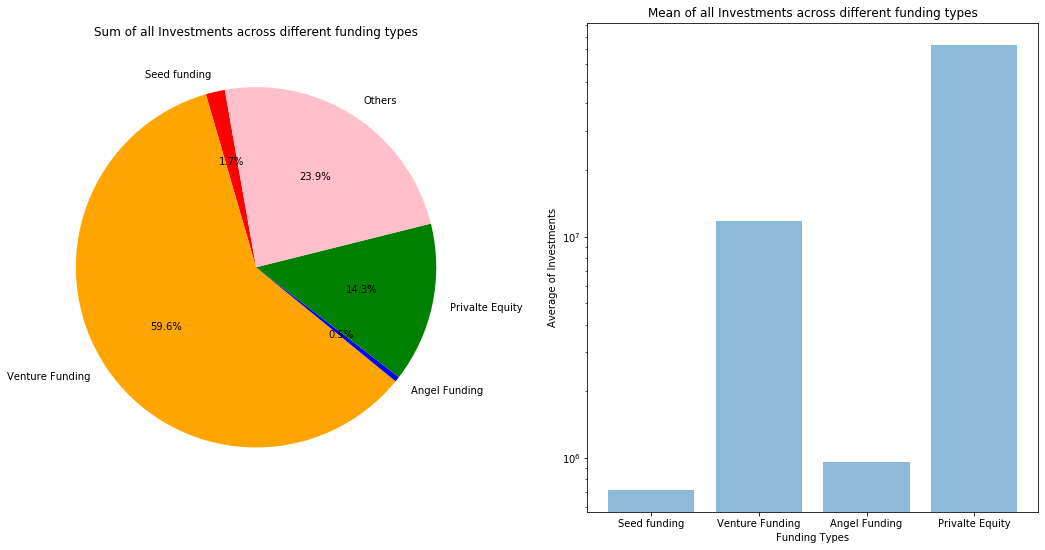

In [193]:
fig, ax = plt.subplots(figsize=(15,8))
plt.figure(1)

#PIE chart to show the sum of investments across the different Funding Types.
plt.subplot(121)
labels1 = ['Seed funding', 'Venture Funding', 'Angel Funding', 'Privalte Equity', 'Others']
plt.title('Sum of all Investments across different funding types')
plt.pie(Raised_amount_usd_fund_types_sum, labels=labels1, autopct='%1.1f%%', startangle=100, colors = ['red', 'orange', 'blue', 'green', 'pink'])

#BAR chart to show the average of investments across the different Funding Types.
plt.subplot(122)
labels2 = ['Seed funding', 'Venture Funding', 'Angel Funding', 'Privalte Equity']
plt.title('Mean of all Investments across different funding types')
plt.xlabel('Funding Types')
plt.ylabel('Average of Investments')
plt.bar(labels2, Raised_amount_usd_fund_types_avg, align='center', alpha=0.5, log=True)

#to keep space between the two subplots
fig.tight_layout(pad=2.0)

#show the plot
plt.show()

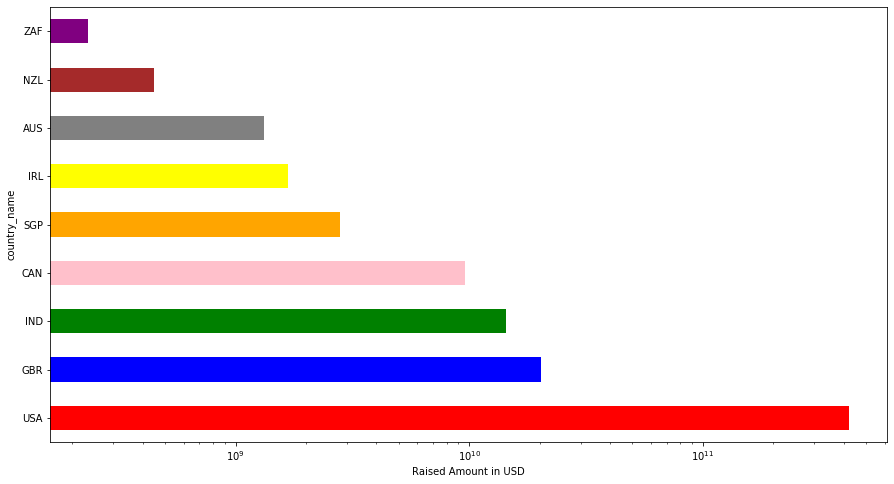

In [194]:
fig, ax = plt.subplots(figsize=(15,8))
top9.plot(kind = 'barh', x = 'country_code', y = 'raised_amount_usd', color = ['red', 'blue', 'green', 'pink', 'orange', 'yellow', 'grey', 'brown', 'purple'], legend = None, ax = ax)
ax.set_xlabel('Raised Amount in USD')
ax.set_ylabel('country_name')
ax.set_xscale('log')

In [195]:
frames = [Top3NumInvWiseD1,Top3NumInvWiseD2, Top3NumInvWiseD3]
Top3NumInvWiseD1D2D3 = pd.concat(frames)
#Top3NumInvWiseD1D2D3 = Top3NumInvWiseD1D2D3.set_index('Country')
Top3NumInvWiseD1D2D3 = Top3NumInvWiseD1D2D3.groupby(['Main_Sector'])
Top3NumInvWiseD1D2D3.head(9)

,Main_Sector,No. of Investments,Amount of Investment,Country
6,Others,2950,2.632101e+10,USA
7,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
1,Cleantech / Semiconductors,2350,2.163343e+10,USA
6,Others,147,1.283624e+09,GBR
7,"Social, Finance, Analytics, Advertising",133,1.089404e+09,GBR
1,Cleantech / Semiconductors,130,1.163990e+09,GBR
6,Others,110,1.013410e+09,IND
7,"Social, Finance, Analytics, Advertising",60,5.505496e+08,IND
5,"News, Search and Messaging",52,4.338345e+08,IND


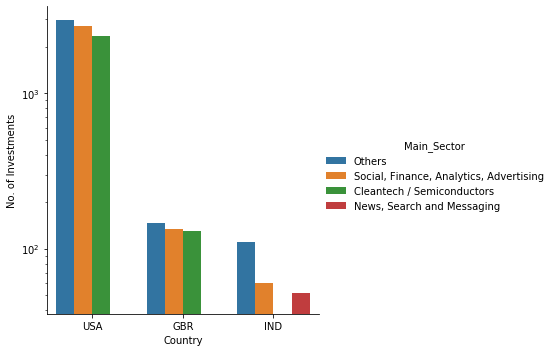

In [196]:
sns.catplot(x='Country', y='No. of Investments', hue = 'Main_Sector', kind = 'bar' ,log =True, data = Top3NumInvWiseD1D2D3.head(9))